In [1]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import data_actions.data_processing.utils as utils

## Categories data exploration for RecSys 2025


In [3]:
data_folder = "data/original_data"
data = utils.load_data(data_folder)

**product_properties** file:
- sku (int64): Numeric ID of the item.
- category (int64): Numeric ID of the item category. 
- price (int64): Numeric ID of the item's price bucket.
- embedding (object): A textual embedding of a product name, compressed using the product quantization method.

In [5]:
products = data["products"]["product_properties"]
products.describe()

statistic,sku,category,price,name
str,f64,f64,f64,str
"""count""",1.197634e6,1.197634e6,1.197634e6,"""1197634"""
"""null_count""",0.0,0.0,0.0,"""0"""
"""mean""",748283.428842,3497.911358,47.466395,null
"""std""",431765.419146,1908.822438,27.894335,null
"""min""",0.0,0.0,0.0,"""[ 0 0 28 150 36 36 4 …"
"""25%""",374395.0,1902.0,24.0,null
"""50%""",748439.0,3378.0,45.0,null
"""75%""",1.12245e6,5131.0,71.0,null
"""max""",1.495777e6,6918.0,99.0,"""[99 76 14 39 39 96 73 96 39 39…"


**product_buy** file:
- client_id (int64): Numeric ID of the client (user).
- timestamp (object): Date and time of the event in the format YYYY-MM-DD HH:mm:ss.
- sku (int64): Numeric ID of the item.

In [64]:
product_buy = data["events"]["product_buy"]
product_buy.describe()

statistic,client_id,timestamp,sku
str,f64,str,f64
"""count""",1.682296e6,"""1682296""",1.682296e6
"""null_count""",0.0,"""0""",0.0
"""mean""",1.1941e7,null,746549.671699
"""std""",6.8918e6,null,433618.826745
"""min""",14.0,"""2022-05-23 00:10:40""",4.0
"""25%""",5.964836e6,null,369890.0
"""50%""",1.1924383e7,null,745837.0
"""75%""",1.791873e7,null,1.121913e6
"""max""",2.3875234e7,"""2022-10-10 23:59:25""",1.495777e6


**add_to_cart** file:
- client_id (int64): Numeric ID of the client (user).
- timestamp (object): Date and time of the event in the format YYYY-MM-DD HH:mm:ss.
- sku (int64): Numeric ID of the item.

In [14]:
added_to_cart = data["events"]["add_to_cart"]
added_to_cart.describe()

statistic,client_id,timestamp,sku
str,f64,str,f64
"""count""",5.235882e6,"""5235882""",5.235882e6
"""null_count""",0.0,"""0""",0.0
"""mean""",1.1941e7,null,748255.043147
"""std""",6.8914e6,null,433663.464805
"""min""",5.0,"""2022-05-23 00:10:15""",0.0
"""25%""",5.964675e6,null,370909.0
"""50%""",1.194213e7,null,748335.0
"""75%""",1.790411e7,null,1.12609e6
"""max""",2.3875211e7,"""2022-10-10 23:59:10""",1.495777e6


**remove_from_cart** file:
- client_id (int64): Numeric ID of the client (user).
- timestamp (object): Date and time of the event in the format YYYY-MM-DD HH:mm:ss.
- sku (int64): Numeric ID of the item.

In [17]:
removed_from_cart = data["events"]["remove_from_cart"]
removed_from_cart.describe()

statistic,client_id,timestamp,sku
str,f64,str,f64
"""count""",1.697891e6,"""1697891""",1.697891e6
"""null_count""",0.0,"""0""",0.0
"""mean""",1.1937e7,null,748744.345105
"""std""",6.8876e6,null,433282.909407
"""min""",125.0,"""2022-05-23 00:11:00""",0.0
"""25%""",5.952338e6,null,371784.0
"""50%""",1.1944942e7,null,749039.0
"""75%""",1.7879097e7,null,1.126615e6
"""max""",2.3875093e7,"""2022-10-10 23:59:55""",1.495777e6


Counting bought categories

In [63]:
product_buy_by_categories = (
    products.join(product_buy, on="sku", how="inner")
    .group_by("category")
    .agg(pl.len().alias("count"))
    .sort("count", descending=True)
)

product_buy_by_categories = product_buy_by_categories.collect()
product_buy_by_categories.head(10)

category,count
i64,u32
3068,42128
5954,26241
3147,19400
3944,18054
2739,13619
5476,13237
4142,12933
6839,12873
4981,11448


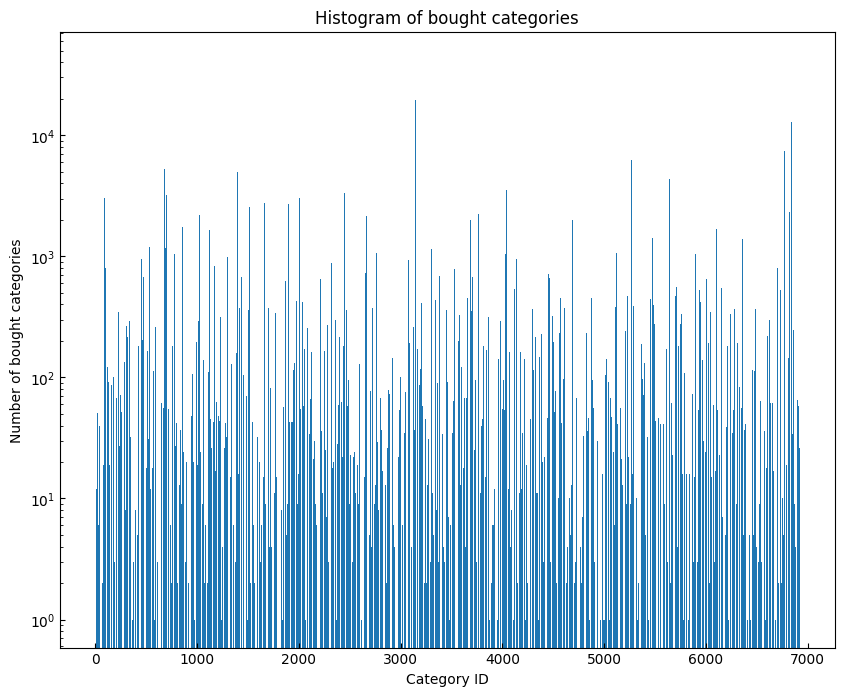

In [59]:
plt.figure(figsize = (10,8))
plt.bar(product_buy_by_categories["category"], product_buy_by_categories["count"])
plt.yscale("log")
plt.xlabel("Category ID")
plt.ylabel("Number of bought categories")
plt.title("Histogram of bought categories")
ax = plt.gca()
ax.tick_params(direction="in", axis="both", which="both")
plt.show()

Counting categories added to cart

In [56]:
added_to_cart_by_categories = (
    products.join(added_to_cart, on="sku", how="inner")
    .group_by("category")
    .agg(pl.len().alias("count"))
    .sort("count", descending=True)
)

added_to_cart_by_categories = added_to_cart_by_categories.collect()
added_to_cart_by_categories.head(10)

category,count
i64,u32
3068,125334
3944,86062
5954,68707
5476,59525
4142,58930
3147,55288
6839,50182
3421,30960
3031,30356


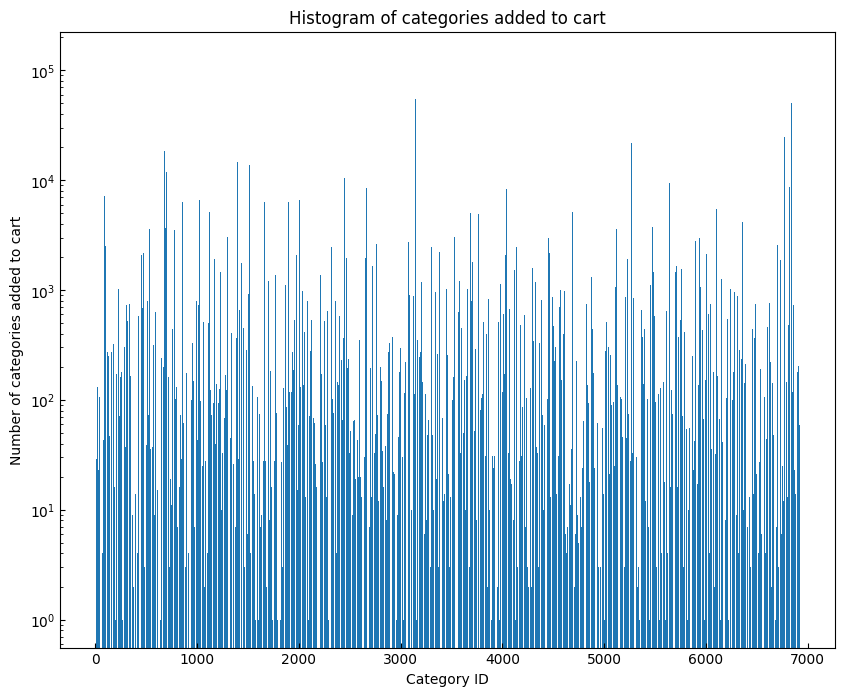

In [57]:
plt.figure(figsize = (10,8))
plt.bar(added_to_cart_by_categories["category"], added_to_cart_by_categories["count"])
plt.yscale("log")
plt.xlabel("Category ID")
plt.ylabel("Number of categories added to cart")
plt.title("Histogram of categories added to cart")
ax = plt.gca()
ax.tick_params(direction="in", axis="both", which="both")
plt.show()

Counting categories remove from cart

In [52]:
removed_from_cart_by_categories = (
    products.join(removed_from_cart, on="sku", how="inner")
    .group_by("category")
    .agg(pl.len().alias("count"))
    .sort("count", descending=True)
)

removed_from_cart_by_categories = removed_from_cart_by_categories.collect()
removed_from_cart_by_categories.head(10)

category,count
i64,u32
3068,39427
3944,29776
5476,23539
5954,22988
4142,22865
6839,18497
3147,17500
3421,13215
605,11065


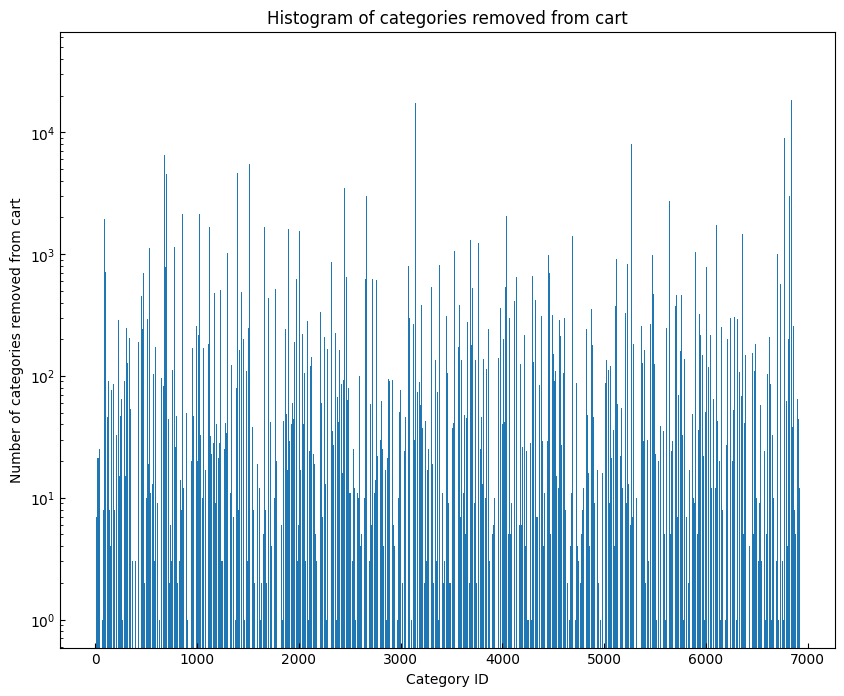

In [54]:
plt.figure(figsize = (10,8))
plt.bar(removed_from_cart_by_categories["category"], removed_from_cart_by_categories["count"])
plt.yscale("log")
plt.xlabel("Category ID")
plt.ylabel("Number of categories removed from cart")
plt.title("Histogram of categories removed from cart")
ax = plt.gca()
ax.tick_params(direction="in", axis="both", which="both")
plt.show()


In [68]:
thresholds = [2 ** i for i in range(14, -1, -1)]

for th in thresholds:
    vv = product_buy_by_categories.filter(pl.col("count") > th)["count"].len() / product_buy_by_categories["count"].len()
    print(f"{vv:.2%} categories were bought more than {th} times")


0.07% categories were bought more than 16384 times
0.20% categories were bought more than 8192 times
0.90% categories were bought more than 4096 times
2.69% categories were bought more than 2048 times
5.83% categories were bought more than 1024 times
11.17% categories were bought more than 512 times
19.46% categories were bought more than 256 times
29.71% categories were bought more than 128 times
40.99% categories were bought more than 64 times
53.06% categories were bought more than 32 times
63.59% categories were bought more than 16 times
73.07% categories were bought more than 8 times
81.24% categories were bought more than 4 times
88.44% categories were bought more than 2 times
93.37% categories were bought more than 1 times
